In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import xarray as xr
import netCDF4
from datetime import datetime as dt
import seaborn as sns
import time
import cartopy.crs as ccrs
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
chlor = xr.open_dataset('../input/cholorophyll-a-copernicus-kasatochi/chl-a.nc')
df = chlor.to_dataframe()

In [3]:
df.loc[:,["date", "lat", "lon"]] = df.index.values.tolist()
df.index = range(len(df))

In [4]:
df.head()

,PICO,PROKAR,HAPTO_uncertainty,PICO_uncertainty,CHL,DINO,HAPTO,flags,GREEN_uncertainty,GREEN,...,MICRO_uncertainty,DIATO,DIATO_uncertainty,PROCHLO_uncertainty,NANO_uncertainty,MICRO,PROKAR_uncertainty,date,lat,lon
0,NaN,NaN,NaN,NaN,0.531391,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01,52.354164,-175.770828
1,NaN,NaN,NaN,NaN,0.569299,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01,52.354164,-175.729172
2,NaN,NaN,NaN,NaN,0.548757,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01,52.354164,-175.687500
3,NaN,NaN,NaN,NaN,0.538497,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01,52.354164,-175.645828
4,NaN,NaN,NaN,NaN,0.526892,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-01-01,52.354164,-175.604172


In [5]:
df.describe()

,PICO,PROKAR,HAPTO_uncertainty,PICO_uncertainty,CHL,DINO,HAPTO,flags,GREEN_uncertainty,GREEN,...,DINO_uncertainty,MICRO_uncertainty,DIATO,DIATO_uncertainty,PROCHLO_uncertainty,NANO_uncertainty,MICRO,PROKAR_uncertainty,lat,lon
count,6871.000000,6871.000000,6871.000000,6871.000000,98338.000000,6871.000000,6871.000000,384696.0,6871.000000,6871.000000,...,6871.000000,6871.000000,6871.000000,6871.000000,6871.000000,6871.000000,6871.000000,6871.000000,384696.000000,384696.000000
mean,0.132398,0.046453,327.669983,327.669983,0.466570,0.104797,0.280972,0.0,327.669983,0.085944,...,327.669983,327.669983,0.722162,327.669983,316.791260,327.669983,0.826959,327.669983,52.187499,-175.520833
std,0.092155,0.027611,0.000000,0.000000,0.472121,0.130970,0.162442,0.0,0.000000,0.081144,...,0.000000,0.000000,2.408408,0.000000,23.461164,0.000000,2.501283,0.000000,0.107583,0.155903
min,0.020216,0.005000,327.669983,327.669983,0.068993,0.013712,0.033622,0.0,327.669983,0.006124,...,327.669983,327.669983,0.033767,327.669983,204.789993,327.669983,0.067447,327.669983,52.020832,-175.770828
25%,0.077619,0.027956,327.669983,327.669983,0.236058,0.037892,0.152563,0.0,327.669983,0.047132,...,327.669983,327.669983,0.136584,327.669983,327.669983,327.669983,0.175811,327.669983,52.104164,-175.645828
50%,0.114916,0.040920,327.669983,327.669983,0.326392,0.062444,0.245210,0.0,327.669983,0.066156,...,327.669983,327.669983,0.224212,327.669983,327.669983,327.669983,0.289732,327.669983,52.187500,-175.520828
75%,0.164520,0.057374,327.669983,327.669983,0.509139,0.114007,0.371183,0.0,327.669983,0.105480,...,327.669983,327.669983,0.444835,327.669983,327.669983,327.669983,0.558098,327.669983,52.270832,-175.395828
max,3.637341,0.361482,327.669983,327.669983,18.046711,1.498236,1.916163,0.0,327.669983,3.414212,...,327.669983,327.669983,40.123516,327.669983,327.669983,327.669983,40.825520,327.669983,52.354164,-175.270828


In [6]:
df.isnull().sum()

PICO                   377825
PROKAR                 377825
HAPTO_uncertainty      377825
PICO_uncertainty       377825
CHL                    286358
DINO                   377825
HAPTO                  377825
flags                       0
GREEN_uncertainty      377825
GREEN                  377825
PROCHLO                377825
NANO                   377825
CHL_uncertainty        286358
DINO_uncertainty       377825
MICRO_uncertainty      377825
DIATO                  377825
DIATO_uncertainty      377825
PROCHLO_uncertainty    377825
NANO_uncertainty       377825
MICRO                  377825
PROKAR_uncertainty     377825
date                        0
lat                         0
lon                         0
dtype: int64

In [7]:
len(df) - df.DIATO.isnull().sum()

6871

In [8]:
df2 = df[['DIATO', 'date']]
df2[df2.DIATO.isna()==True]

,DIATO,date
0,NaN,2004-01-01
1,NaN,2004-01-01
2,NaN,2004-01-01
3,NaN,2004-01-01
4,NaN,2004-01-01
...,...,...
384691,NaN,2012-12-31
384692,NaN,2012-12-31
384693,NaN,2012-12-31
384694,NaN,2012-12-31


In [9]:
df.dropna(inplace=True)
df

,PICO,PROKAR,HAPTO_uncertainty,PICO_uncertainty,CHL,DINO,HAPTO,flags,GREEN_uncertainty,GREEN,...,MICRO_uncertainty,DIATO,DIATO_uncertainty,PROCHLO_uncertainty,NANO_uncertainty,MICRO,PROKAR_uncertainty,date,lat,lon
6084,0.062971,0.020702,327.669983,327.669983,0.416151,0.056931,0.236307,0,327.669983,0.042269,...,327.669983,0.247965,327.669983,327.669983,327.669983,0.304896,327.669983,2004-02-22,52.354164,-175.770828
6085,0.066174,0.022268,327.669983,327.669983,0.440341,0.062054,0.241895,0,327.669983,0.043906,...,327.669983,0.267497,327.669983,327.669983,327.669983,0.329550,327.669983,2004-02-22,52.354164,-175.729172
6086,0.071400,0.018580,327.669983,327.669983,0.433033,0.057666,0.275546,0,327.669983,0.052821,...,327.669983,0.285470,327.669983,327.669983,327.669983,0.343136,327.669983,2004-02-22,52.354164,-175.687500
6087,0.072258,0.017749,327.669983,327.669983,0.435477,0.056660,0.280064,0,327.669983,0.054509,...,327.669983,0.292953,327.669983,327.669983,327.669983,0.349613,327.669983,2004-02-22,52.354164,-175.645828
6088,0.069567,0.016708,327.669983,327.669983,0.419336,0.056827,0.276918,0,327.669983,0.052859,...,327.669983,0.310594,327.669983,327.669983,327.669983,0.367421,327.669983,2004-02-22,52.354164,-175.604172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377248,0.116165,0.072285,327.669983,327.669983,0.314139,0.026954,0.072684,0,327.669983,0.043880,...,327.669983,0.081057,327.669983,327.669983,327.669983,0.108011,327.669983,2012-10-29,52.229164,-175.729172
377249,0.161257,0.106234,327.669983,327.669983,0.307373,0.029196,0.076002,0,327.669983,0.055023,...,327.669983,0.068682,327.669983,327.669983,327.669983,0.097879,327.669983,2012-10-29,52.229164,-175.687500
377250,0.172752,0.108787,327.669983,327.669983,0.317661,0.031492,0.081269,0,327.669983,0.063966,...,327.669983,0.068186,327.669983,327.669983,327.669983,0.099678,327.669983,2012-10-29,52.229164,-175.645828
377251,0.185959,0.111784,327.669983,327.669983,0.328784,0.033797,0.086341,0,327.669983,0.074174,...,327.669983,0.067402,327.669983,327.669983,327.669983,0.101199,327.669983,2012-10-29,52.229164,-175.604172


In [10]:
def stamptodate(x):
    return time.mktime(dt.strptime(x[:10], "%Y-%m-%d").timetuple())

<Figure size 1440x864 with 0 Axes>

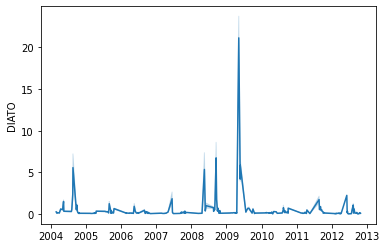

In [11]:
plt.figure(figsize=(20,12))
fig, ax = plt.subplots()
ax = sns.lineplot(df['date'].dt.to_pydatetime(), df['DIATO'].astype(float));

In [12]:
for i in range(1,30):
    print(df[df['date']==f'2008-06-{i}'].date)

Series([], Name: date, dtype: datetime64[ns])
Series([], Name: date, dtype: datetime64[ns])
189033   2008-06-03
189034   2008-06-03
189035   2008-06-03
189036   2008-06-03
189046   2008-06-03
189047   2008-06-03
189048   2008-06-03
189049   2008-06-03
189050   2008-06-03
189060   2008-06-03
189061   2008-06-03
Name: date, dtype: datetime64[ns]
Series([], Name: date, dtype: datetime64[ns])
Series([], Name: date, dtype: datetime64[ns])
Series([], Name: date, dtype: datetime64[ns])
Series([], Name: date, dtype: datetime64[ns])
Series([], Name: date, dtype: datetime64[ns])
Series([], Name: date, dtype: datetime64[ns])
Series([], Name: date, dtype: datetime64[ns])
Series([], Name: date, dtype: datetime64[ns])
Series([], Name: date, dtype: datetime64[ns])
Series([], Name: date, dtype: datetime64[ns])
Series([], Name: date, dtype: datetime64[ns])
Series([], Name: date, dtype: datetime64[ns])
Series([], Name: date, dtype: datetime64[ns])
Series([], Name: date, dtype: datetime64[ns])
Series([],

In [13]:
df.loc(0)[df['date']=='2008-08-18'].date

197849   2008-08-18
197850   2008-08-18
197851   2008-08-18
197852   2008-08-18
197853   2008-08-18
            ...    
197958   2008-08-18
197959   2008-08-18
197960   2008-08-18
197961   2008-08-18
197962   2008-08-18
Name: date, Length: 105, dtype: datetime64[ns]

(-175.7708282470703, -175.2708282470703)

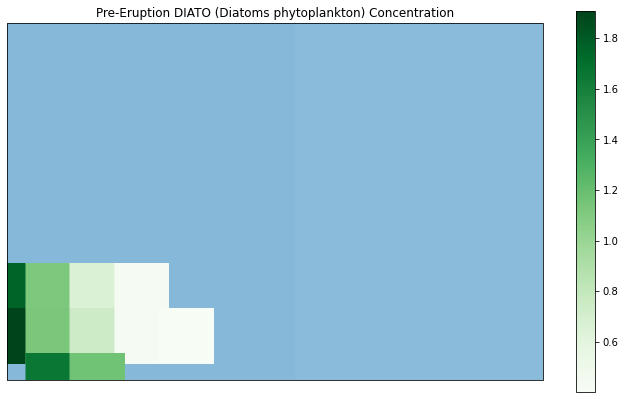

In [14]:
plt.rcParams['figure.figsize'] = (12,7)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines(resolution='110m')
rect = list(zip([-0.041656494140625,0.041656494140625,0.041656494140625,-0.041656494140625],[-0.041656494140625,-0.041656494140625,0.041656494140625,0.041656494140625]))
ax.set_extent([-175.2708,-175.7708,52.02083,52.35416])
plt.scatter(y='lat',x ='lon',
            data=df[df['date']=='2008-06-03'], 
            c='DIATO', 
            cmap='Greens',
            s=[54.6559**2]*len(df[df['date']=='2008-06-03']),
            marker=rect,
            transform=ccrs.PlateCarree()
           )
plt.colorbar()
ax.set_title("Pre-Eruption DIATO (Diatoms phytoplankton) Concentration")
ax.set_ylim(df['lat'].min(), df['lat'].max())
ax.set_xlim(df['lon'].min(), df['lon'].max())

(-175.7708282470703, -175.2708282470703)

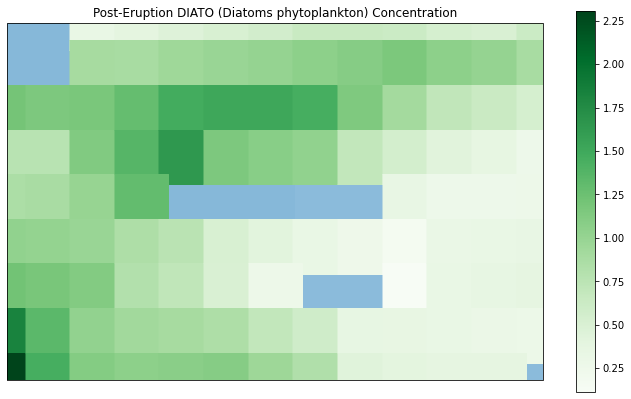

In [15]:
plt.rcParams['figure.figsize'] = (12,7)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines(resolution='110m')
rect = list(zip([-0.041656494140625,0.041656494140625,0.041656494140625,-0.041656494140625],[-0.041656494140625,-0.041656494140625,0.041656494140625,0.041656494140625]))
ax.set_extent([-175.2708,-175.7708,52.02083,52.35416])
plt.scatter(y='lat',x ='lon',
            data=df[df['date']=='2008-08-18'], 
            c='DIATO', 
            cmap='Greens',
            s=[54.6559**2]*len(df[df['date']=='2008-08-18']),
            marker=rect,
            transform=ccrs.PlateCarree()
           )
plt.colorbar()
ax.set_title("Post-Eruption DIATO (Diatoms phytoplankton) Concentration")
ax.set_ylim(df['lat'].min(), df['lat'].max())
ax.set_xlim(df['lon'].min(), df['lon'].max())